# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Nuha Nurfauziyyah
- **Email:** nuhanu@student.uns.ac.id
- **ID Dicoding:** nuhanu

---




Bike sharing adalah sistem transportasi sepeda umum yang bisa disewakan. Konsep ini memungkinkan orang untuk menyewa sepeda dari satu lokasi ke lokasi tertentu kemudian mengembalikannya ke tempat yang telah ditentukan.

---


## **Menentukan Pertanyaan Bisnis**

Pertanyaan bisnis dibuat untuk mengarahkan hasil analisis data pada tujuan yang sesuai.

---



- Apakah cuaca mempengaruhi jumlah pengguna sepeda?
- Bagaimana korelasi pengaruh jumlah pengguna sepeda dengan musim?
- Bagaimana tren jumlah penyewa sepeda setiap bulannya pada tahun 2011 dan 2012?


---
## **Import Semua Packages/Library yang Digunakan**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

---
## **Data Wrangling**

### 1. Gathering Data
Tahapan ini kita akan memasukkan data yang telah kita ambil dari sumber, yaitu dataset bike sharing.


In [4]:
#Input data bike-sharing day
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#Input data bike-sharing hour
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 2. Assessing Data
proses yang bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas.

2.1 Data day

In [6]:
# Cek tipe data day

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


*   Terlihat dari hasil bahwa data di kolom dteday memiliki tipe object padahal seharusnya datetime artinya tipe data perlu diperbaiki
*   Season, weekday, mnth dengan nilai integer perlu dikonversi ke dalam nilai string.



In [7]:
#Cek Missing Values
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data day tidak ada missing values

In [9]:
# Cek duplikasi data
day_df.duplicated().sum()

0

Terlihat tidak ada duplikasi data

In [10]:
# Print nilai statistik deskriptif
day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


2.2 Data Hour

In [11]:
# Cek tipe data hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


*   Terlihat dari hasil bahwa data di kolom dteday memiliki tipe object padahal seharusnya datetime artinya tipe data perlu diperbaiki
* Season, weekday, mnth dengan nilai integer perlu dikonversi ke dalam nilai string




In [12]:
# Cek Missing Values data hour
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Terlihat bahwa data hour tidak ada missing values

In [13]:
# Cek duplikasi data
hour_df.duplicated().sum()

0

Terlihat data hour tidak memiliki duplikasi data

In [15]:
# Cetak statistik deskriptif data hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### 3. Cleaning Data
proses identifikasi, koreksi, dan penghapusan kesalahan atau anomali dalam kumpulan data

In [16]:
# Menghapus data hour

# Data dihapus karena nantinya tidak gunakan. Data tidak relevan dengan pertanyaan bisnis yang ditentukan di awal.
del hour_df

In [18]:
# Mengubah nama kolom menjadi nama yang lebih jelas
     # Misalkan yr dirubah menjadi year

day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()



,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
# Seperti yang sudah dituliskan sebelumnya pada saat Assesing data,
# kita perlu mengubah beberapa kolom dari integer menjadi string

day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [22]:
# Mengubah tipe data dateday dari object ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data beberapa kolom ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [23]:
# Cek kembali hasil data yang sudah kita rubah

day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dateday       731 non-null    datetime64[ns]
 2   season        731 non-null    category      
 3   year          731 non-null    category      
 4   month         731 non-null    category      
 5   holiday       731 non-null    category      
 6   weekday       731 non-null    category      
 7   workingday    731 non-null    category      
 8   weather_cond  731 non-null    category      
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  count         731 non-null    int64     

---
## **Exploratory Data Analysis (EDA)**

### Explore Data Day

1. Data bike sharing dikelompokkan berdasarkan bulan

In [24]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Dari hasil di atas, dapat disimpulkan bahwa bulan dengan jumlah penyewa sepeda terbanyak adalah bulan Agustus dengan jumlah 351194 sewaan dan bulan dengan jumlah terkecil adalah bulan Januari dengan jumlah 134933 sewaan.

2. Data bike sharing dikelompokkan berdasarkan kategori cuaca

In [25]:
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Dari hasil diatas, dapat disimpulkan bahwa cuaca yang paling banyak diminati oleh para penyewa sepeda adalah saat cuaca cerah atau berawan. Hujan dan/atau saat salju lebat menjadi cuaca dengan paling sedikit jumlah penyewa sepeda.

3. Data bike sharing dikelompokkan berdasarkan hari

In [26]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

Dari hasil tampilan di atas, Hari jumat menjadi hari dengan rata-rata jumlah penyewa sepeda terbanyak. Kemudian, disusul oleh hari Kamis, Sabtu, Rabu, Selasa, Senin, dan Minggu.

4. Melihat hubungan korelasi antara setiap variabel

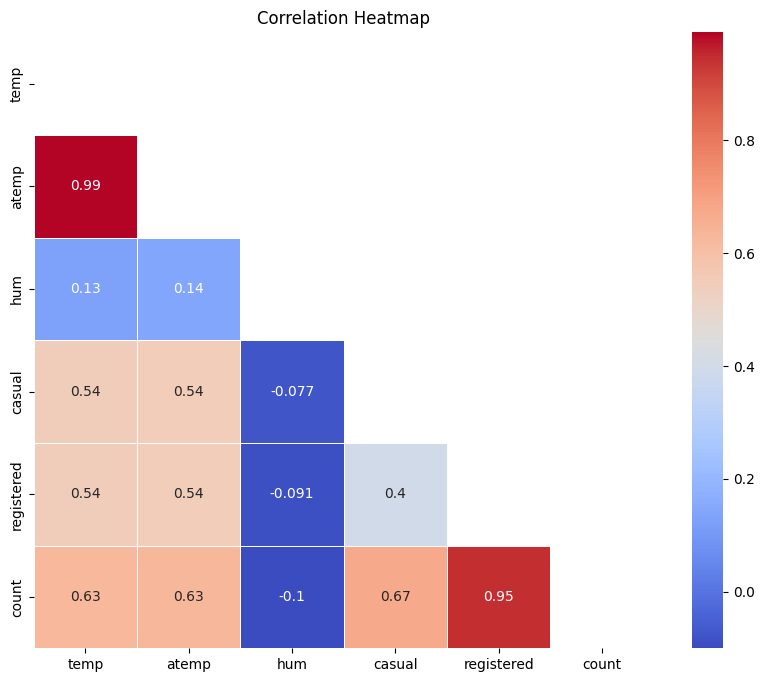

In [31]:
# Ambil subset dari day_df dengan kolom yang ingin dihitung korelasinya
subset_df = day_df[['temp', 'atemp', 'hum', 'casual', 'registered', 'count']]

# Hitung korelasi antar kolom
correlation_matrix = subset_df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Buat heatmap dengan seaborn
sns.heatmap(
    correlation_matrix,
    mask= mask,
    annot=True, cmap="coolwarm",
    linewidths=.5)

# Tampilkan plot
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan korelasi diatas, hubungan dapat diinterpretasikan sebagai berikut.

*   Penyewa casual adalah penyewa yang bukan pelanggan tetap. Penyewa casual memiliki nilai 0,54 terhadap temperatur artinya memiliki hubungan positif yang cukup kuat. Penyewa casual memiliki nilai -0,077 mendekati nol terhadap humidity(kelembapan) yang artinya memiliki hubungan negatif dan hubungan cukup lemah.
*   Penyewa registered adalah penyewa yang merupakan pelanggan tetap. Penyewa registered memiliki nilai 0,54 terhadap temperatur artinya memiliki hubungan positif yang cukup kuat. Penyewa registered memiliki nilai -0,091 mendekati nol terhadap humidity(kelembapan) yang artinya memiliki hubungan negatif dan hubungan cukup lemah.
*   Penyewa count adalah gabungan penyewa bukan pelanggan dan pelanggan tetap. Secara umum, penyewa sepeda memiliki nilai korelasi 0,63 terhadap temperatur artinya memiliki hubungan positif yang cukup kuat. Secara umum, penyewa sepeda memiliki nilai korelasi -0,1 mendekati nol terhadap humidity(kelembapan) yang artinya memiliki hubungan negatif dan hubungan cukup lemah.





---
## **Visualization & Explanatory Analysis**

### **Pertanyaan 1:**
- Apakah cuaca mempengaruhi jumlah pengguna sepeda?


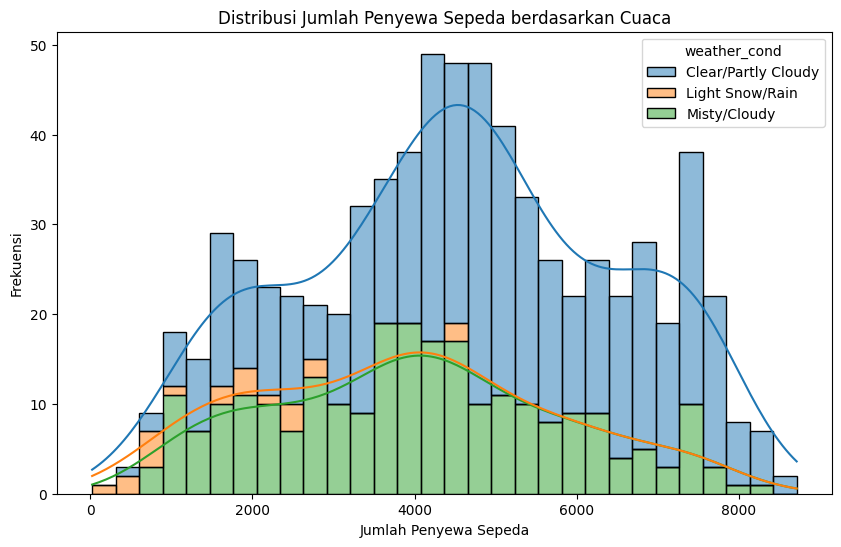

In [33]:
# Pilih kolom jumlah penyewa sepeda total yaitu kolom count dan kolom cuaca yaitu kolom weather_cond
subset_df = day_df[['weather_cond', 'count']]

# Buat plot menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=subset_df,
             x='count',
             hue='weather_cond',
             multiple="stack",
             bins=30,
             kde=True)

# Atur label dan judul plot
plt.xlabel('Jumlah Penyewa Sepeda')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jumlah Penyewa Sepeda berdasarkan Cuaca')

# Tampilkan plot
plt.show()

Berdasarkan hasil visualisasi data diatas menggunakan histogram, dapat disimpulkan bahwa terdapat hubungan antara cuaca dengan banyaknya penyewa sepeda. Cuaca dengan jumlah penyewa sepeda terbanyak dengan frekuensi terbanyak adalah saat cuaca clear/partly cloudy, kemudian pada urutan selanjutnya ada light snow/rain, dan misty/cloudy.

### **Pertanyaan 2:**
- Bagaimana korelasi pengaruh jumlah pengguna sepeda dengan musim?

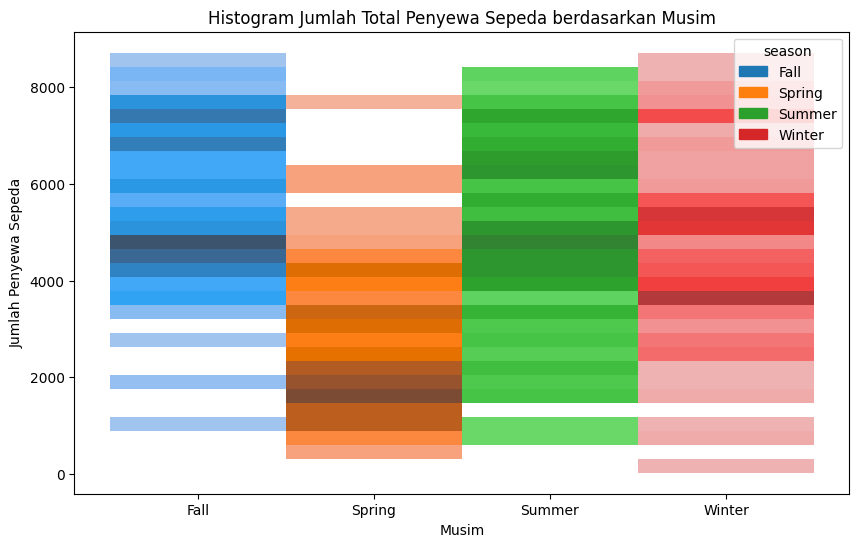

In [58]:

# Buat histogram menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=day_df, x='season', y ='count',hue='season', bins=30, kde=True)

plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewa Sepeda")
plt.title("Histogram Jumlah Total Penyewa Sepeda berdasarkan Musim")

# Show the plot
plt.show()


Berdasarkan hasil diatas, kita dapat beberapa insight sebagai berikut.


*   Pada saat musim semi (spring) penyewa sepeda cenderung sedikit. Jumlah penyewa mencapai 2000 penyewa paling banyak.
*  Pada saat musim dingin (winter) penyewa juga cenderung sedikit. Jumlah penyewa paling banyak yang ditandai dengan warna gelap mencapai 4000 penyewa.
*  Pada saat suhu normal, yaitu pada musim gugur dan panas, jumlah penyewa sepeda cenderung banyak, berada dikisaran 4000 hingga 8000 penyewa sepeda terbanyak





### **Pertanyaan 3**
- Bagaimana tren jumlah penyewa sepeda setiap bulannya pada tahun 2011 dan 2012?

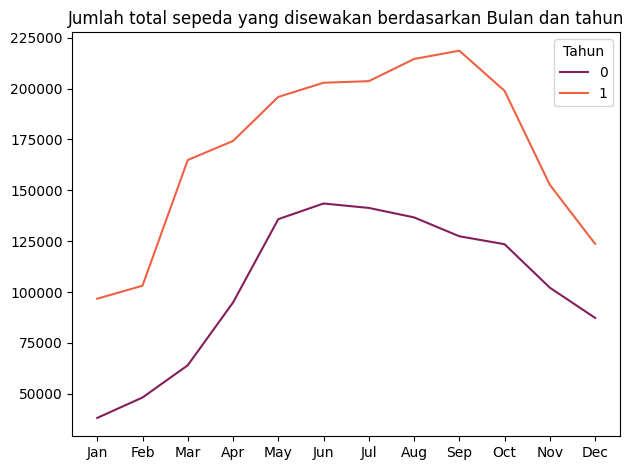

In [65]:
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()


Dari Plot, terlihat adanya tren yang sama pada tahun 2011 dan 2012. Periode bulan Maret hingga Oktober (suhu tinggi) merupakan periode dengan jumlah penyewa sepeda terbanyak. periode bulan November hingga Februari (suhu rendah) merupakan periode dengan jumlah penyewa sepeda cenderung rendah.

## **Conclusion**

- ** Conclution pertanyaan 1**

      Berikut adalah ringkasan konklusi berdasarkan visualisasi histogram:

      1. Cuaca Clear/Partly Cloudy:

      Cuaca ini berhubungan dengan jumlah penyewa sepeda terbanyak.
      Frekuensi penyewa sepeda paling tinggi terjadi saat cuaca clear/partly cloudy.
      Kemungkinan besar, cuaca cerah atau sebagian berawan lebih mengundang orang untuk menggunakan sepeda.
      
      2.Light Snow/Rain:

      Urutan selanjutnya dalam jumlah penyewa sepeda adalah pada cuaca light snow/rain.
      Meskipun kondisi cuaca mungkin kurang ideal, masih terdapat sejumlah orang yang memilih untuk menyewa sepeda.
      
      3. Misty/Cloudy:

      Cuaca misty/cloudy juga menunjukkan frekuensi penyewa sepeda yang cukup tinggi.
      Meskipun tidak sebanyak pada cuaca clear/partly cloudy, masih terdapat minat penyewaan yang signifikan saat kondisi cuaca ini.


- ** Conclution pertanyaan 2**
      Berikut adalah ringkasan insight yang dapat diambil dari analisis tersebut:

      1 Musim Semi (Spring):
      Jumlah penyewa sepeda cenderung sedikit, dengan puncak sekitar 2000 penyewa.
      Ini menunjukkan bahwa musim semi mungkin bukan waktu utama bagi masyarakat untuk menyewa sepeda, mungkin karena faktor cuaca atau kegiatan lainnya.

      2. Musim Dingin (Winter):
      Jumlah penyewa sepeda juga cenderung sedikit pada musim dingin.
      Terdapat puncak jumlah penyewa yang lebih tinggi, mencapai sekitar 4000 penyewa.
      Faktor-faktor seperti cuaca dingin atau potensi gangguan pada transportasi sepeda dapat mempengaruhi tingkat penyewaan pada musim ini.

      3. Musim Gugur dan Panas:
      Pada musim gugur dan panas, jumlah penyewa sepeda cenderung tinggi.
      Rentang jumlah penyewa berada antara 4000 hingga 8000 penyewa, menunjukkan bahwa musim ini menjadi waktu populer bagi masyarakat untuk menyewa sepeda.

      Cuaca yang lebih hangat dan kondisi lingkungan yang nyaman mungkin menjadi faktor utama dalam peningkatan minat penyewaan sepeda.
      Dengan memahami pola ini, penyedia layanan sepeda dapat mengoptimalkan operasional mereka, misalnya dengan menyesuaikan inventaris sepeda atau strategi pemasaran, untuk mengakomodasi fluktuasi permintaan yang terkait dengan musim dan suhu.

- ** Conclution pertanyaan 3**

        Berdasarkan plot tren jumlah penyewa sepeda per bulan untuk tahun 2011 dan 2012:

        1. Periode Maret hingga Oktober (suhu tinggi):

        Jumlah penyewa sepeda cenderung tinggi.
        Terdapat tren peningkatan yang konsisten selama periode ini.
        Ini dapat dihubungkan dengan suhu yang lebih hangat selama bulan-bulan ini, yang mungkin membuat orang lebih cenderung untuk menyewa sepeda.

        2. Periode November hingga Februari (suhu rendah):

        Jumlah penyewa sepeda cenderung rendah.
        Tren menunjukkan penurunan jumlah penyewa selama periode ini.
        Suhu yang lebih rendah selama bulan-bulan ini mungkin menjadi faktor dalam menurunnya minat penyewaan sepeda.
        Dengan melihat tren ini, dapat disimpulkan bahwa suhu memainkan peran penting dalam jumlah penyewa sepeda. Pada suhu yang lebih hangat, minat untuk menyewa sepeda meningkat, sementara pada suhu yang lebih rendah, minat cenderung menurun.